In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import ipywidgets as widgets
pio.renderers.default = 'notebook'
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)

In [21]:
from fredapi import Fred
fred_key = "981efcd7e9faf439aa70c00d5ae16089"
fred=Fred(api_key=fred_key)

In [22]:
CPI_search= fred.search("Estimate of Median Household Income California ")
print(CPI_search)

                                            id realtime_start realtime_end                                              title observation_start observation_end frequency frequency_short                           units               units_short      seasonal_adjustment seasonal_adjustment_short               last_updated popularity                                              notes
series id                                                                                                                                                                                                                                                                                                                                                                                      
MEHOINUSCAA646N                MEHOINUSCAA646N     2024-08-08   2024-08-08              Median Household Income in California        1984-01-01      2022-01-01    Annual               A                 Current Dollars               

In [23]:
la=fred.get_series("MHICA06037A052NCEN")
la.name="y"
df=pd.DataFrame(la).reset_index()
df.rename(columns = {"index":"ds"}, inplace=True)
df2=df[df["ds"]>"1997-01-01"]
print(df2)

           ds        y
9  1998-01-01  37655.0
10 1999-01-01  38900.0
11 2000-01-01  42045.0
12 2001-01-01  41573.0
13 2002-01-01  41506.0
14 2003-01-01  41544.0
15 2004-01-01  43518.0
16 2005-01-01  48166.0
17 2006-01-01  51279.0
18 2007-01-01  53494.0
19 2008-01-01  55452.0
20 2009-01-01  54375.0
21 2010-01-01  52595.0
22 2011-01-01  52239.0
23 2012-01-01  52929.0
24 2013-01-01  54443.0
25 2014-01-01  55686.0
26 2015-01-01  59045.0
27 2016-01-01  61308.0
28 2017-01-01  64912.0
29 2018-01-01  67986.0
30 2019-01-01  72721.0
31 2020-01-01  75624.0
32 2021-01-01  77356.0
33 2022-01-01  82455.0


In [24]:
ny=fred.get_series("MHINY36061A052NCEN")
ny.name="y"
df3=pd.DataFrame(ny).reset_index()
df3.rename(columns = {"index":"ds"}, inplace=True)
df4=df3[df3["ds"]>"1997-01-01"]
print(df3)

           ds        y
0  1989-01-01  27667.0
1  1990-01-01      NaN
2  1991-01-01      NaN
3  1992-01-01      NaN
4  1993-01-01  31962.0
5  1994-01-01      NaN
6  1995-01-01  34405.0
7  1996-01-01      NaN
8  1997-01-01  38224.0
9  1998-01-01  41590.0
10 1999-01-01  42436.0
11 2000-01-01  44085.0
12 2001-01-01  42732.0
13 2002-01-01  43239.0
14 2003-01-01  43930.0
15 2004-01-01  45290.0
16 2005-01-01  55561.0
17 2006-01-01  59542.0
18 2007-01-01  63704.0
19 2008-01-01  68402.0
20 2009-01-01  68295.0
21 2010-01-01  63188.0
22 2011-01-01  65833.0
23 2012-01-01  66739.0
24 2013-01-01  71443.0
25 2014-01-01  75459.0
26 2015-01-01  75136.0
27 2016-01-01  77214.0
28 2017-01-01  84133.0
29 2018-01-01  84610.0
30 2019-01-01  93007.0
31 2020-01-01  87745.0
32 2021-01-01  84371.0
33 2022-01-01  95514.0


<Axes: xlabel='ds'>

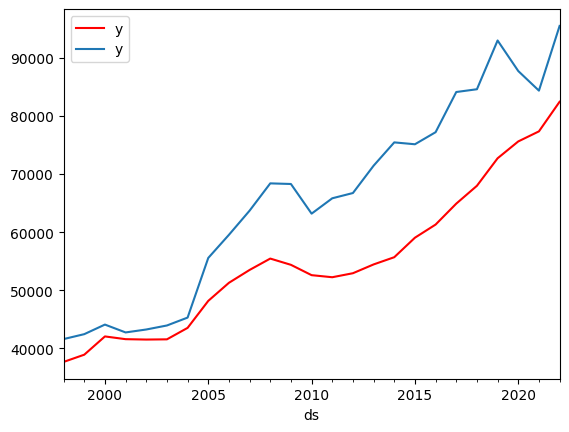

In [25]:
ax=df2.plot(x="ds", y="y", color="red")
df4.plot(ax=ax, x="ds", y="y")


In [29]:
import numpy as np
np.float_ = np.float64
from prophet import Prophet
ml=Prophet()
ml.fit(df2)
ml1=Prophet()
ml1.fit(df4)
future=ml.make_future_dataframe(periods=10, freq="YE")
future1=ml1.make_future_dataframe(periods=10, freq="YE")
result=ml.predict(future)
result[['ds','yhat', 'yhat_lower', 'yhat_upper']]
result.tail()
result1=ml1.predict(future1)
result1[['ds','yhat', 'yhat_lower', 'yhat_upper']]
result1.tail()


14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
30,2027-12-31,41831.355011,92912.585783,101968.292647,41831.351292,41831.358837,55343.542569,55343.542569,55343.542569,55343.542569,55343.542569,55343.542569,0.0,0.0,0.0,97174.897581
31,2028-12-31,44132.704241,102580.547333,112299.510392,44132.699613,44132.709177,63270.150730,63270.150730,63270.150730,63270.150730,63270.150730,63270.150730,0.0,0.0,0.0,107402.854971
32,2029-12-31,46427.765631,102669.169455,112549.832266,46427.760023,46427.771565,61245.135186,61245.135186,61245.135186,61245.135186,61245.135186,61245.135186,0.0,0.0,0.0,107672.900817
33,2030-12-31,48722.827022,102674.178514,112443.445370,48722.820196,48722.834173,58601.450617,58601.450617,58601.450617,58601.450617,58601.450617,58601.450617,0.0,0.0,0.0,107324.277639
34,2031-12-31,51017.888412,101707.430058,111360.926391,51017.880300,51017.896723,55343.542569,55343.542569,55343.542569,55343.542569,55343.542569,55343.542569,0.0,0.0,0.0,106361.430981


Text(0.5, 1.0, 'Los Angeles Median Income Over Years')

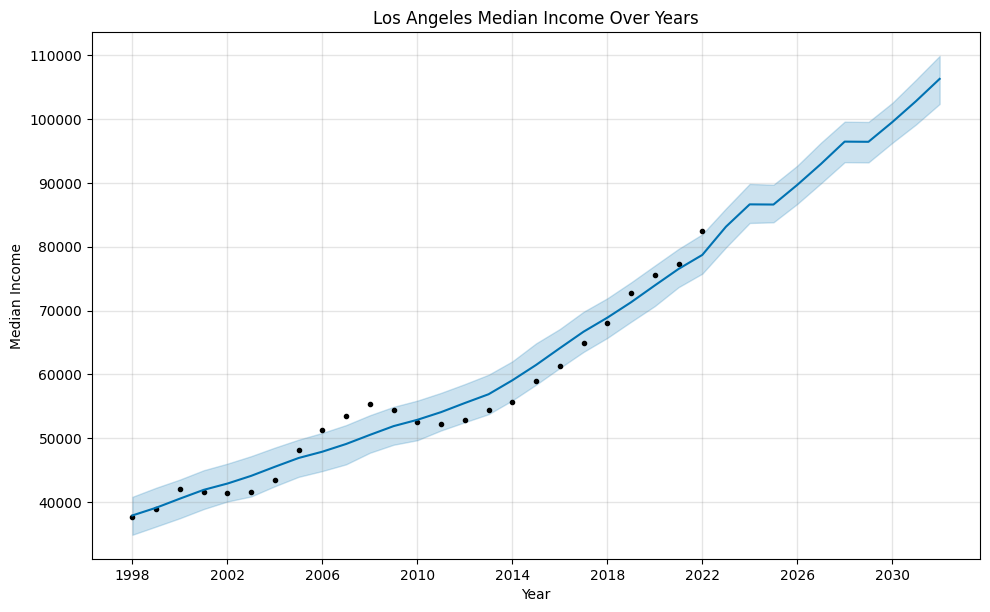

In [32]:
fig=ml.plot(result, xlabel="Year",ylabel="Median Income" )
ax=fig.gca()
ax.set_title("Los Angeles Median Income Over Years")



Text(0.5, 1.0, 'New York City Median Income Over Years')

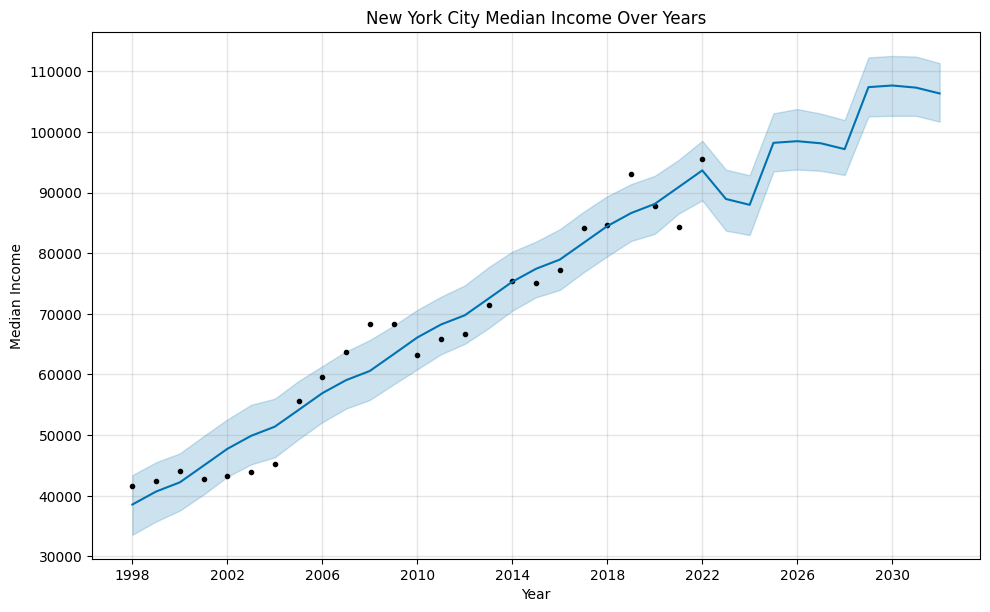

In [34]:
fig1=ml1.plot(result1, xlabel="Year",ylabel="Median Income" )
ax=fig1.gca()
ax.set_title("New York City Median Income Over Years")
